In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [22]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [39]:
# create engine to hawaii.sqlite

engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn=engine.connect()

In [17]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(engine, reflect = True)

In [18]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [19]:
# Save references to each table
Station = base.classes.station
Measurement = base.classes.measurement

In [20]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [28]:
# Find the most recent date in the data set.
inspector = inspect(engine)
inspector.get_table_names()


['measurement', 'station']

In [30]:
columns_m = inspector.get_columns('measurement')
for c in columns_m:
    print (c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [31]:
columns_s = inspector.get_columns('station')
for c in columns_s:
    print (c['name'], c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [34]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [35]:
# Calculate the date one year from the last date in data set.
session.query(Measurement.date).\
    filter(Measurement.date > '2016-08-23')

In [45]:
# Perform a query to retrieve the data and precipitation scores
precip = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > '2016-08-23').all()

In [49]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precip_data = pd.DataFrame(precip, columns = ['date', 'prcp']).set_index('date')
precip_data.head(10)

,prcp
date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01
2016-08-29,0.00
2016-08-30,0.00
2016-08-31,0.13
2016-09-01,0.00


In [53]:
# Sort the dataframe by date
sorted_precip = precip_data.sort_values(by='date')
sorted_precip

,prcp
date,
2016-08-24,0.08
2016-08-24,NaN
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,2.15
...,...
2017-08-22,0.00
2017-08-23,0.08
2017-08-23,0.00


([<matplotlib.axis.XTick at 0x20a1969b710>,
 <a list of 12 Text major ticklabel objects>)

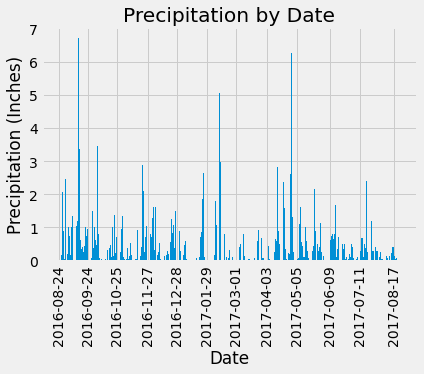

In [73]:
# Use Pandas Plotting with Matplotlib to plot the data
x_axis = sorted_precip.index
y_axis = sorted_precip['prcp']
plt.bar(x_axis, y_axis)
plt.xlabel('Date')
plt.ylabel('Precipitation (Inches)')
plt.title("Precipitation by Date")
plt.xticks(x_axis[::200], rotation='vertical')

In [77]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_mean = round(sorted_precip['prcp'].mean(),2)
prcp_median = round(sorted_precip['prcp'].median(),2)
prcp_mode = round(sorted_precip['prcp'].mode(),2)
prcp_quartiles = sorted_precip['prcp'].quantile([0.25, 0.5, 0.75])
lowerq = prcp_quartiles[0.25]
upperq = prcp_quartiles[0.75]
iqr = upperq - lowerq

print(f"Mean precipitation: {prcp_mean}")
print(f"Median precipitation: {prcp_median}")
print(f"Mode precipitation: {prcp_mode}")
print(f"Interquartile Range: {iqr}")

Mean precipitation: 0.18
Median precipitation: 0.02
Mode precipitation: 0    0.0
dtype: float64
Interquartile Range: 0.13


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()